# HR Analytics: Employee Attrition Prediction

Employee attrition poses a significant challenge for organizations worldwide, impacting productivity, morale, and financial stability. Traditional methods for analyzing attrition rely on surveys, performance reviews, and managerial assessments; however, these approaches can be time-consuming, subjective, and often fail to capture underlying patterns. Machine learning offers a powerful solution to this problem by analyzing employee data to identify key factors contributing to attrition. By leveraging algorithms to detect correlations and trends that may be overlooked in traditional analyses, organizations can make data-driven decisions to improve retention strategies. The objective is to use the available data, including demographic information, job-related factors, and workplace satisfaction metrics—to predict whether an employee is likely to leave the company

Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import classification_report
from scipy.stats import chi2_contingency


## **1. Load and explore Dataset**

In [2]:
df = pd.read_csv("HR_Analytics.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Get the number of rows and columns

In [3]:
num_rows, num_cols = df.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 1470
Number of columns: 35



Prints the data types of each column

In [4]:
column_types = df.dtypes

print("Types of columns:")
print(column_types)

Types of columns:
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
To

Checking for null values

In [5]:
nulls_exist = df.isnull().any().any()

if nulls_exist:
    print("There are null values in the DataFrame.")
else:
    print("There are no null values in the DataFrame.")

There are no null values in the DataFrame.


## **2. Exploratory Data Analysis (EDA)**

Summary statistics

In [6]:
display(df.describe())

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


1-Age:
The average age is approximately 36.92 years, with a minimum age of 18 and a maximum of 60 years.
The age distribution has a wide range, with a standard deviation of 9.14 years, indicating diverse age groups in the dataset.

2-Daily Rate:
The average daily rate is 802.49, with values ranging from 102 to 1499, showing considerable variation in daily compensation.
The standard deviation of 403.51 highlights a broad spectrum in compensation.

3-Distance From Home:
Employees have an average commuting distance of 9.19, with a minimum distance of 1 and a maximum of 29, suggesting some employees commute much farther than others.

4-Education:
The dataset shows a variety of education levels
The education levels range from 1 to 5, indicating differences in academic backgrounds among employees.

5-Employee Count:
All employees are counted as one, which could be a constant column and does not provide useful variation.

6-Environment Satisfaction:
The average score for environment satisfaction is 2.72, with the values ranging from 1 to 4, suggesting moderate satisfaction among employees.

7-Hourly Rate:
The average hourly rate is 65.89, with a range from 30 to 100, indicating variability in hourly compensation among employees.

8-Job Involvement:
Employees exhibit a wide range of job involvement, with an average of 2.73 and scores from 1 to 4.

9-Job Level:
Job levels range from 1 to 5, with an average level of 2.06, suggesting the majority of employees are at entry or mid-level positions.

10-Years At Company:
The average tenure at the company is 7.01 years, with employees ranging from 0 to 40 years, highlighting a mixture of both long-term and newer employees.

11-Years in Current Role:
The average tenure in the current role is 4.23 years, showing employees are relatively stable in their positions.

12-Years Since Last Promotion:
The average years since the last promotion is 2.19, with values ranging from 0 to 15, indicating some employees may not have been promoted recently.

13-Years With Current Manager:
The average number of years with the current manager is 4.12, indicating long employee-manager relationships, but values range from 0 to 17 years, showing variability in employee tenure under their current managers.

Descriptive statistics for non-numeric columns

In [7]:
df.describe(include=['O'])

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


Attrition:
The dataset has 1,470 entries, with 1,233 employees with no attrition (No) and 237 with attrition(Yes).The data is imbalanced, which could lead to biased predictions favoring the majority class.

Business Travel:
The majority of employees (1,043) travel rarely. This indicates that most employees have minimal travel requirements.

Department:
Employees are mostly concentrated in the Research & Development department (961). This shows that the organization is primarily focused on development and sales.

Education Field:
The largest group of employees comes from Life Sciences (606), suggesting that many employees have backgrounds in science-related fields.

Gender:
The majority of employees are Male (882), with Female employees making up the rest (588).

Job Role:
The most common job role is Sales Executive (326),This indicates a significant focus on sales roles.

Marital Status:
Most employees are Married (673). This could suggest a higher representation of individuals in stable, long-term personal relationships.

Over 18:
All employees in the dataset are over 18 years old (1,470), confirming the data includes only adult employees.

Overtime:
A significant portion of employees (1,054) do not work overtime, while 416 employees do. This could indicate a work-life balance preference or differences in job roles and responsibilities.

Visualizing the distribution of target variable

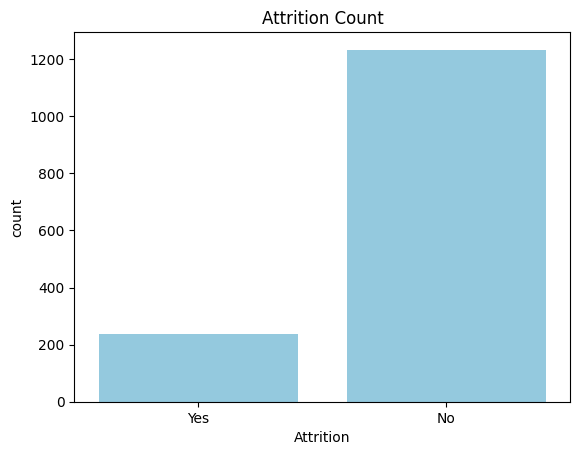

In [8]:
sns.countplot(x=df['Attrition'], color='skyblue')
plt.title("Attrition Count")
plt.show()

The bar plot visualizes the distribution of the **Attrition** variable, showing that the majority of employees are categorized as **No** (indicating no attrition), with over 1,200 employees in this group. Only around 237 employees fall under **Yes**, representing those with attrition. This imbalance highlights a skewed distribution, with a significantly larger number of employees not experiencing attrition. The data's imbalance could affect model performance, making it challenging to predict the minority class accurately.

Monthly Income Distribution

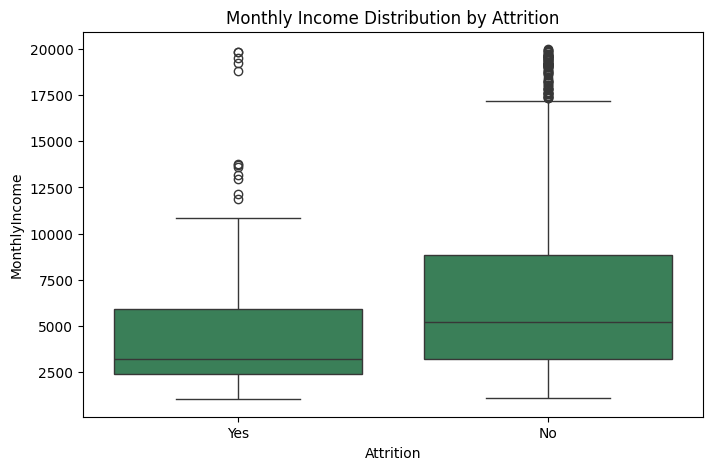

In [9]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, color='seagreen')
plt.title('Monthly Income Distribution by Attrition')
plt.show()

The box plot shows the monthly income distribution based on attrition (1 for employees with attrition and 0 for employees without attrition).

Employees with attrition (Attrition = 1) have a monthly income distribution with a range mostly between $2,500 and $5,000, and some outliers exceeding $12,000. This indicates that employees who left tend to have lower monthly incomes on average, with a few earning higher than the general range.

Employees without attrition (Attrition = 0) exhibit a broader income range, with the majority earning between $2,500 and $7,500. There are several outliers on the higher end, some surpassing $17,500.

This suggests that employees with lower monthly incomes are more likely to experience attrition, while those with higher incomes tend to stay with the company.

Correlation Heatmap

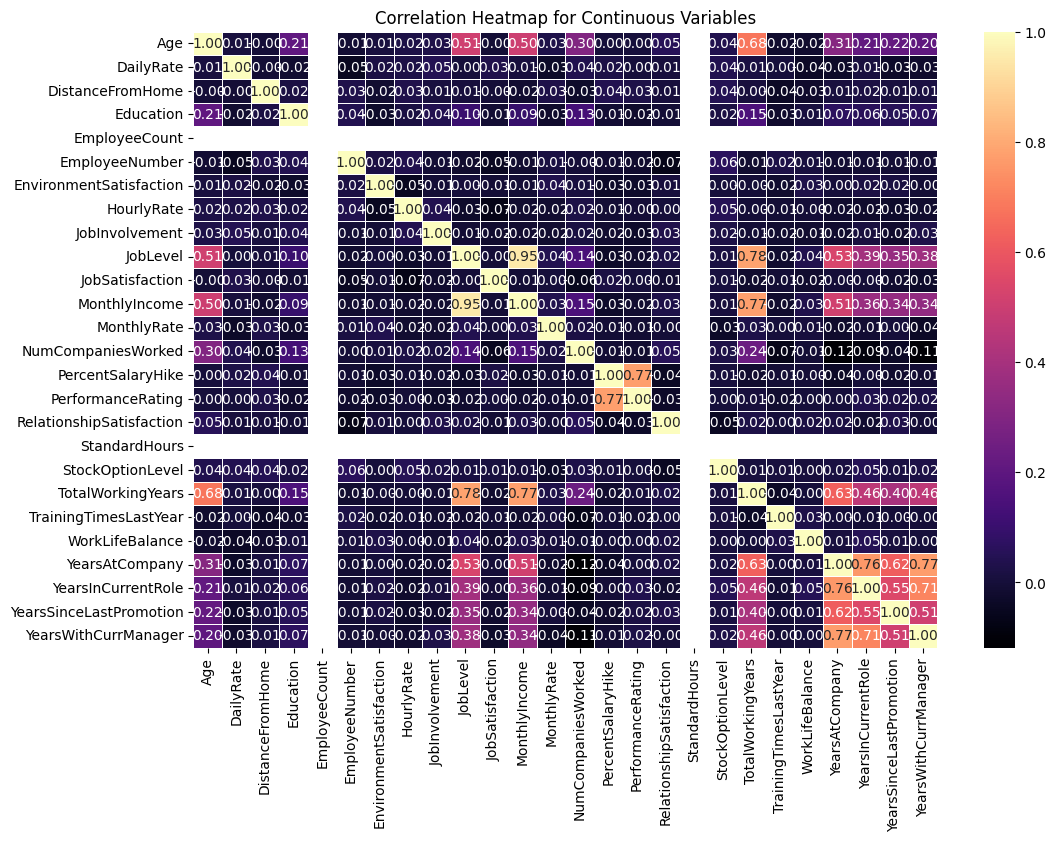

In [10]:
continuous_columns = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[continuous_columns].corr(), cmap='magma', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap for Continuous Variables")
plt.show()

Based on the Correlation Heatmap for continuous variables, here are the key insights:

1. High Correlations:

TotalWorkingYears and YearsAtCompany have a strong positive correlation (0.77). This suggests that employees with longer total working experience tend to stay longer at the company.


YearsAtCompany and YearsInCurrentRole also show a positive correlation (0.55), indicating that employees who have been with the company for longer tend to stay in their current roles for longer.


EmployeeNumber and EmployeeCount are not strongly correlated with other variables, implying these might be unique identifiers with little to no influence on other factors.


2. Negative Correlations:

Age and MonthlyIncome have a moderate negative correlation (-0.50). Older employees tend to have lower salaries.


YearsWithCurrManager and YearsAtCompany also have a negative correlation (-0.49), suggesting that employees with fewer years with their current manager might have spent a shorter time at the company.


TrainingTimesLastYear and WorkLifeBalance show a negative correlation (-0.40), suggesting that employees with more training sessions tend to report lower work-life balance, possibly indicating work pressure related to training.


3. Low Correlations:

Education and JobSatisfaction have a very low correlation (0.02), indicating that educational background does not significantly influence job satisfaction.


PerformanceRating and other variables like JobSatisfaction and WorkLifeBalance have very weak correlations, suggesting performance ratings might not be directly linked to these factors.


4. Other Notable Insights:

MonthlyIncome is positively correlated with JobSatisfaction (0.50), meaning employees with higher salaries tend to report better job satisfaction.

JobSatisfaction is negatively correlated with YearsSinceLastPromotion (-0.28), suggesting that employees who have not been promoted in a while may have lower job satisfaction.

In [11]:
# List of categorical variables
categorical_columns = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

# Chi-Square Test for all categorical variables with "Attrition"
for col in categorical_columns:
    print(f"\nChi-Square Test for {col} with Attrition:")

    # Create a contingency table between categorical variable and Attrition
    contingency_table = pd.crosstab(df[col], df['Attrition'])
    chi2, p, _, _ = chi2_contingency(contingency_table)  # Perform Chi-Square test
    print(f"  - {col} vs Attrition: p-value = {p}")





Chi-Square Test for BusinessTravel with Attrition:
  - BusinessTravel vs Attrition: p-value = 5.608614476449931e-06

Chi-Square Test for Department with Attrition:
  - Department vs Attrition: p-value = 0.004525606574479633

Chi-Square Test for EducationField with Attrition:
  - EducationField vs Attrition: p-value = 0.006773980139025212

Chi-Square Test for Gender with Attrition:
  - Gender vs Attrition: p-value = 0.29057244902890855

Chi-Square Test for JobRole with Attrition:
  - JobRole vs Attrition: p-value = 2.752481638050657e-15

Chi-Square Test for MaritalStatus with Attrition:
  - MaritalStatus vs Attrition: p-value = 9.45551106034083e-11

Chi-Square Test for OverTime with Attrition:
  - OverTime vs Attrition: p-value = 8.15842372153832e-21


Summary of Insights:
The Department, BusinessTravel, JobRole, EducationField, MaritalStatus, and OverTime variables show statistically significant relationships with Attrition, indicating that these factors influence whether an employee stays or leaves the company.
Gender do not show significant relationships with Attrition, suggesting this factors have little or no effect on employee turnover in this dataset.

<ipython-input-12-3bbdc0488b70>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Attrition', data=df, estimator=lambda x: sum(x == 1) / len(x), palette='Set2')  # Calculate attrition rate


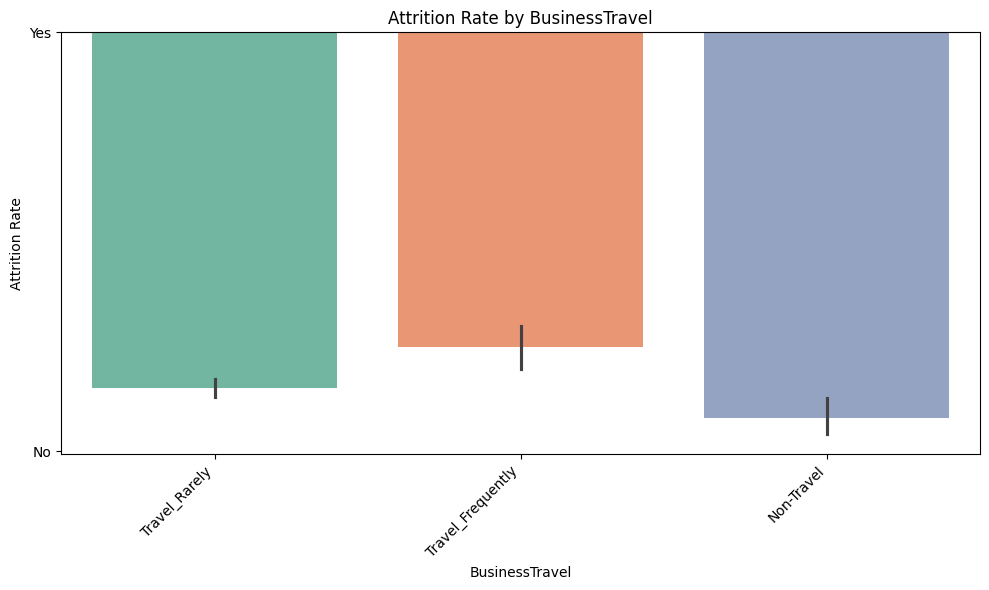

<ipython-input-12-3bbdc0488b70>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Attrition', data=df, estimator=lambda x: sum(x == 1) / len(x), palette='Set2')  # Calculate attrition rate


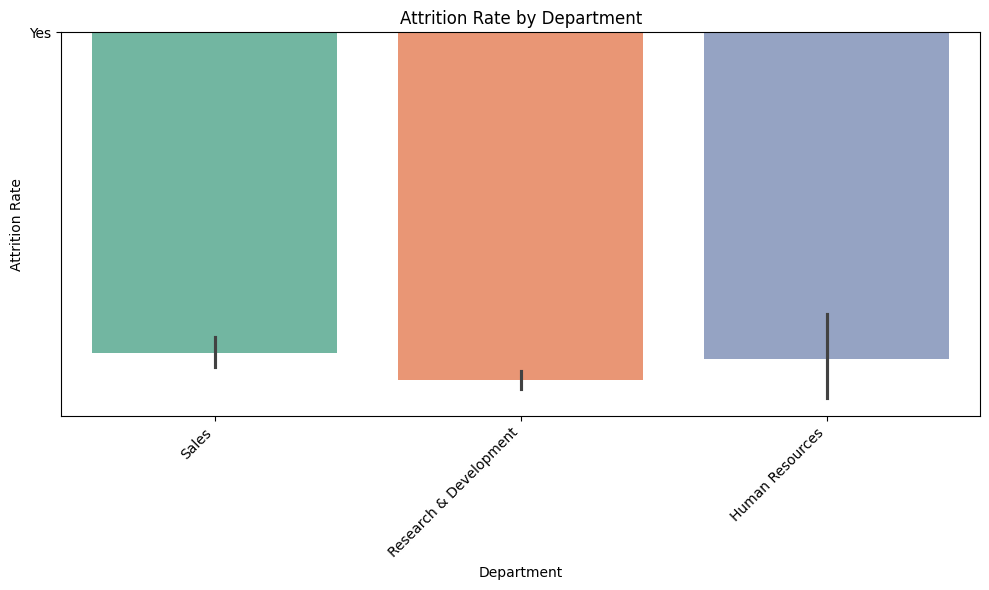

<ipython-input-12-3bbdc0488b70>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Attrition', data=df, estimator=lambda x: sum(x == 1) / len(x), palette='Set2')  # Calculate attrition rate


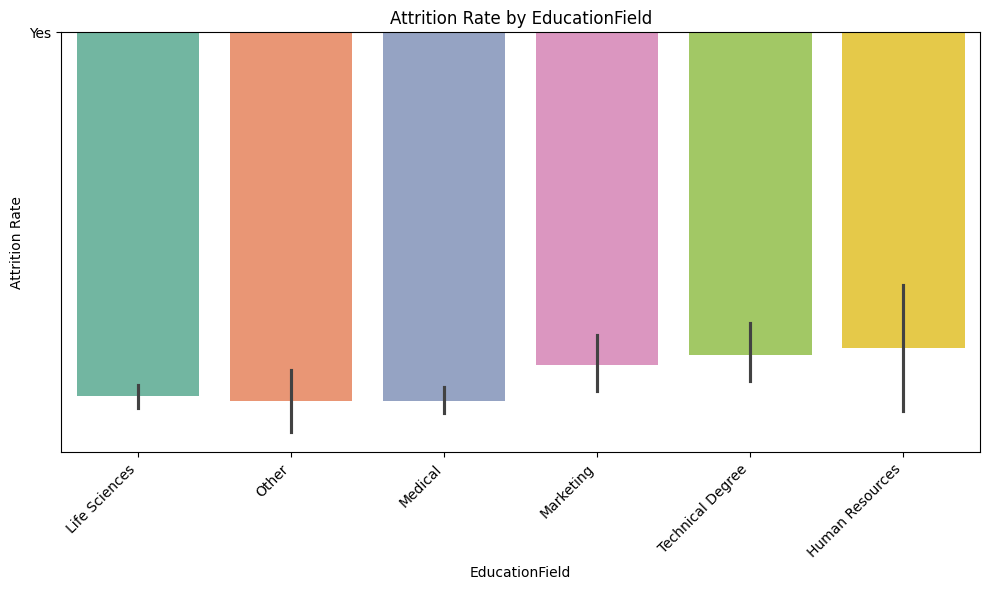

<ipython-input-12-3bbdc0488b70>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Attrition', data=df, estimator=lambda x: sum(x == 1) / len(x), palette='Set2')  # Calculate attrition rate


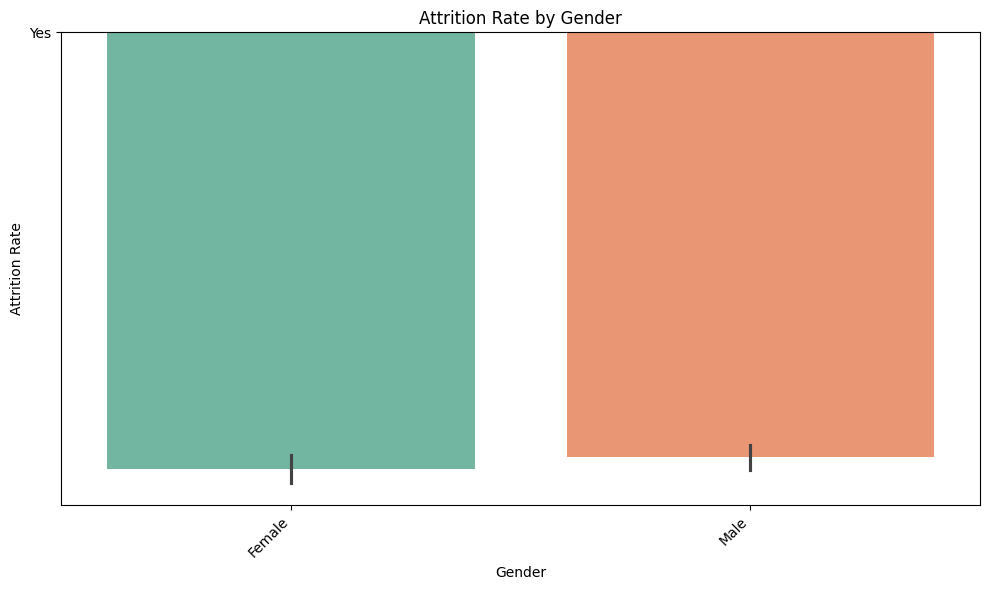

<ipython-input-12-3bbdc0488b70>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Attrition', data=df, estimator=lambda x: sum(x == 1) / len(x), palette='Set2')  # Calculate attrition rate


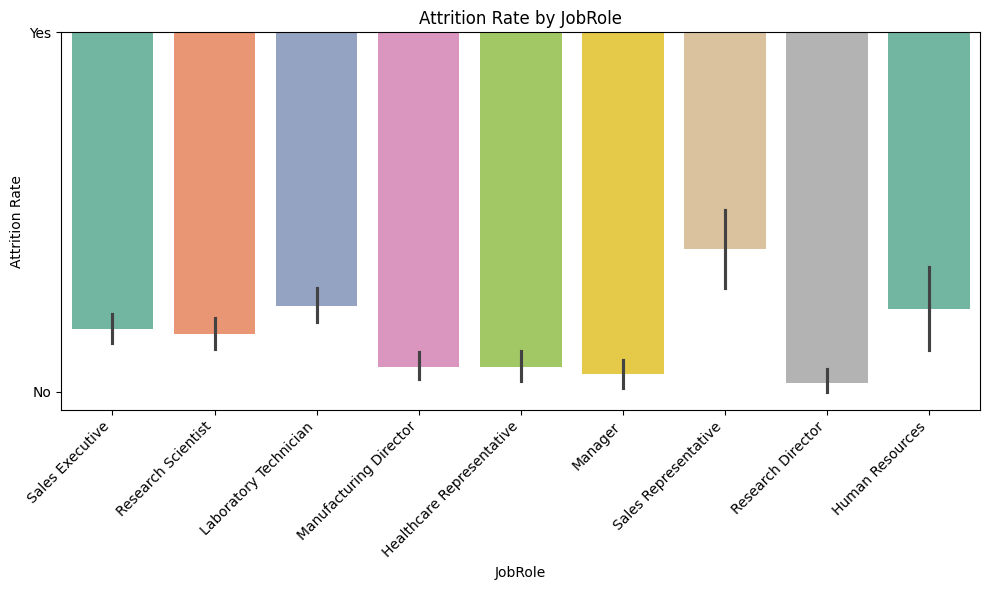

<ipython-input-12-3bbdc0488b70>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Attrition', data=df, estimator=lambda x: sum(x == 1) / len(x), palette='Set2')  # Calculate attrition rate


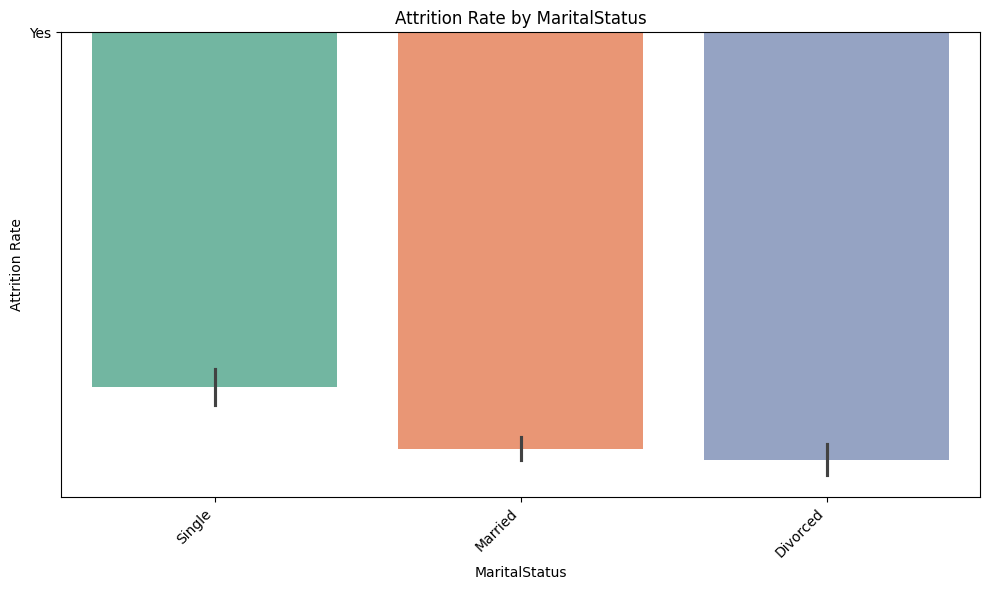

<ipython-input-12-3bbdc0488b70>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Attrition', data=df, estimator=lambda x: sum(x == 1) / len(x), palette='Set2')  # Calculate attrition rate


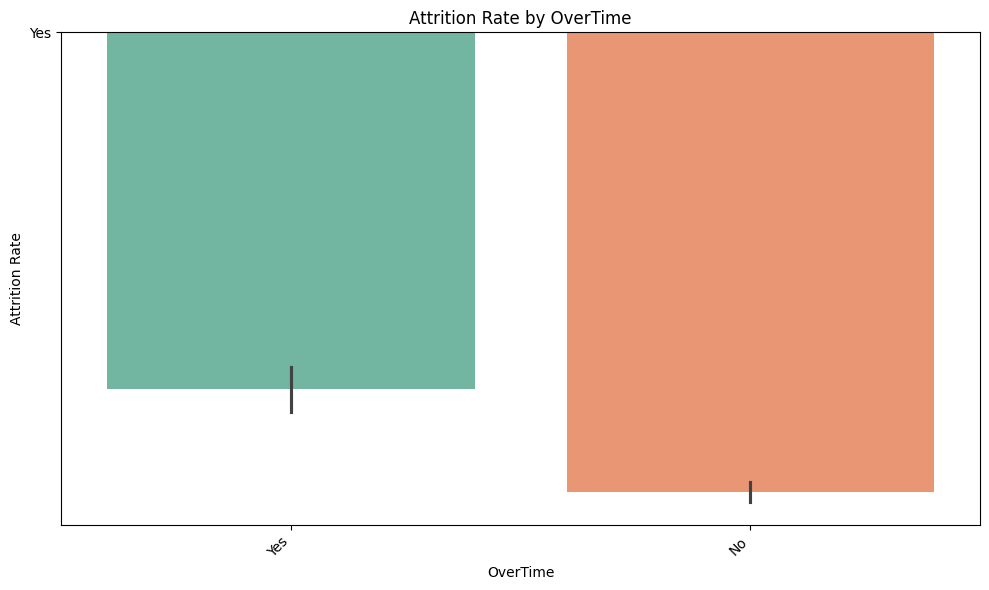

In [12]:
# Create a barplot for each categorical variable showing the attrition rate
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=col, y='Attrition', data=df, estimator=lambda x: sum(x == 1) / len(x), palette='Set2')  # Calculate attrition rate
    plt.title(f'Attrition Rate by {col}')
    plt.xlabel(col)
    plt.ylabel('Attrition Rate')

    # Rotate x-axis labels to prevent overlap
    plt.xticks(rotation=45, ha='right')

    # Adjust layout for better fitting
    plt.tight_layout()
    plt.show()


The analysis of attrition rates across various categorical variables provides the following insights:

1. Business Travel: Employees who travel frequently have a higher attrition rate compared to those who travel rarely or not at all.

2. Department: Attrition rates are relatively similar between the Sales and Research & Development departments, with Human Resources having a slightly lower rate.

3. Education Field: Employees with backgrounds in "Life Sciences" have the lowest attrition rate, while those with backgrounds in "Marketing" and "Other" fields exhibit higher attrition.

4. Gender: There is no significant difference in attrition rates between male and female employees.

5. Job Role: Job roles such as Sales Executive and Research Scientist show higher attrition rates, while roles like Healthcare Representative and Human Resources display lower attrition rates.

6. Marital Status: Employees who are divorced have the highest attrition rate, followed by married employees, with single employees showing the lowest rate.

7. Overtime: Employees who work overtime tend to have a higher attrition rate compared to those who do not.

Overall, these findings suggest that certain factors like travel frequency, job roles, marital status, and overtime significantly influence employee attrition.

## **3. Data Cleaning (Making Data Usable)**

3.1 Drop columns that are irrelevant for modeling

In [13]:
df.drop(columns=['EmployeeNumber', 'EmployeeCount', 'StandardHours','Over18','PerformanceRating'], inplace=True)

* EmployeeNumber – This is just a unique identifier for each employee, so it doesn’t contribute to the prediction.
* EmployeeCount –  all values are 1, it means this column holds no variability and doesn't add any meaningful information.
* StandardHours – all values are 80, then it’s the same for every employee, meaning it won’t help differentiate between employees who leave and those who stay.



3.2 Ensure Attrition is categorical (0 or 1)

In [14]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['Attrition'] = df['Attrition'].astype(int)
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,11,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,23,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,15,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,11,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,12,4,1,6,3,3,2,2,2,2


3.3 .There are no null values in the DataFrame as we knew in part 2 the EDA.

3.4 . Handling duplicate records.

In [15]:
# Find duplicates
duplicates = df[df.duplicated(keep=False)]  # keep=False to mark all duplicates
if not duplicates.empty:
    print("\nDuplicates found:")
    print(duplicates)
    print("\nCount of duplicates:", len(duplicates))
else:
    print("No duplicates found.")

# Optionally, remove duplicates
df_cleaned = df.drop_duplicates()

# Display the DataFrame after removing duplicates
print("\nDataFrame after removing duplicates:")
print(df_cleaned.head())

# Save the cleaned DataFrame to a new CSV file
df_cleaned.to_csv("Cleaned_HR_Analytics.csv", index=False)
print("\nCleaned dataset saved to 'Cleaned_HR_Analytics.csv'")

No duplicates found.

DataFrame after removing duplicates:
   Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  ...  PercentSalaryHike  Relationsh

3.5 . Handling outliers.

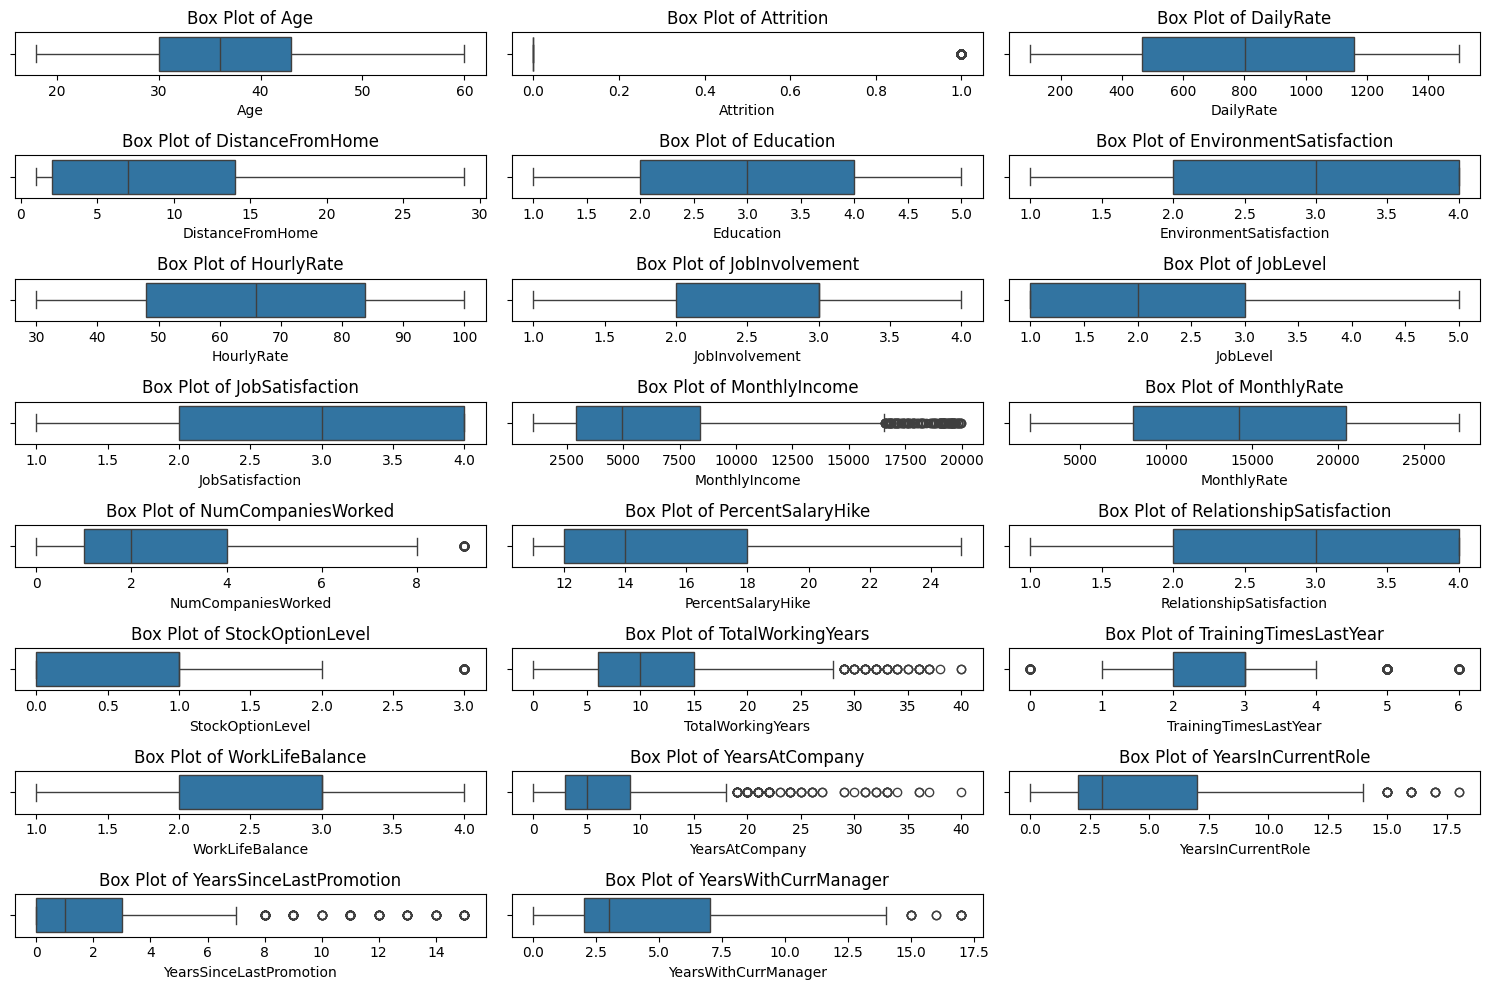

Outliers detected using Z-Score:
{'Age': array([], dtype=int64), 'Attrition': array([], dtype=int64), 'DailyRate': array([], dtype=int64), 'DistanceFromHome': array([], dtype=int64), 'Education': array([], dtype=int64), 'EnvironmentSatisfaction': array([], dtype=int64), 'HourlyRate': array([], dtype=int64), 'JobInvolvement': array([], dtype=int64), 'JobLevel': array([], dtype=int64), 'JobSatisfaction': array([], dtype=int64), 'MonthlyIncome': array([], dtype=int64), 'MonthlyRate': array([], dtype=int64), 'NumCompaniesWorked': array([], dtype=int64), 'PercentSalaryHike': array([], dtype=int64), 'RelationshipSatisfaction': array([], dtype=int64), 'StockOptionLevel': array([], dtype=int64), 'TotalWorkingYears': array([  85,   98,  126,  187,  270,  401,  445,  595,  624,  894,  956,
       1043, 1116, 1184, 1301, 1401]), 'TrainingTimesLastYear': array([], dtype=int64), 'WorkLifeBalance': array([], dtype=int64), 'YearsAtCompany': array([  62,   98,  126,  190,  237,  270,  411,  425,  473,

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load your dataset
df = pd.read_csv("Cleaned_HR_Analytics.csv")

# Function to detect outliers using Box Plot
def plot_boxplot(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    # Calculate the number of rows and columns for the subplots
    num_cols = len(numeric_cols)
    num_rows = (num_cols + 2) // 3  # Calculate rows, add 2 to ensure enough space

    plt.figure(figsize=(15, 10))
    for i, col in enumerate(numeric_cols, 1):
        # Use num_rows and num_cols to create subplots
        plt.subplot(num_rows, 3, i)  # Adjust layout dynamically
        sns.boxplot(x=df[col])
        plt.title(f'Box Plot of {col}')
    plt.tight_layout()
    plt.show()

# Function to detect outliers using Z-Score
def z_score_outliers(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    outliers = {}

    for col in numeric_cols:
        # Calculate Z-scores
        z_scores = np.abs(stats.zscore(df[col]))
        outliers[col] = np.where(z_scores > 3)[0]  # Get indexes of outliers
    return outliers

# Function to detect outliers using IQR
def iqr_outliers(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    outliers = {}

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outlier_condition = (df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))
        outliers[col] = df[outlier_condition].index.tolist()  # Get indexes of outliers
    return outliers

# Main workflow
if __name__ == "__main__":
    # Step 1: Plot box plots to visually inspect for outliers
    plot_boxplot(df)

    # Step 2: Detect outliers using Z-Score
    z_score_outliers_result = z_score_outliers(df)
    print("Outliers detected using Z-Score:")
    print(z_score_outliers_result)

    # Step 3: Detect outliers using IQR
    iqr_outliers_result = iqr_outliers(df)
    print("Outliers detected using IQR:")
    print(iqr_outliers_result)

Here we did code snippet that implements capping of outliers at the 5th and 95th percentiles for each numeric column in your DataFrame. After this process, it will save the modified DataFrame back to a CSV file named Cleaned_HR_Analytics.csv.

In [17]:
import pandas as pd

# Function to calculate and cap outliers
def cap_outliers(df):
    outliers_count_before = {}  # To store outliers count before capping
    outliers_count_after = {}   # To store outliers count after capping

    # Loop through only numerical columns
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        # Skip the 'Attrition' column if it's present
        if column == 'Attrition':
            continue

        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count outliers before capping
        outliers_count_before[column] = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()

        # Cap the outliers
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

        # Count outliers after capping
        outliers_count_after[column] = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()

    return df, outliers_count_before, outliers_count_after

# Assuming df is your DataFrame
df_capped, outliers_before, outliers_after = cap_outliers(df)

# Display the results
print("Outliers count before capping:")
print(outliers_before)

print("\nOutliers count after capping:")
print(outliers_after)

# Save the cleaned DataFrame with capped outliers to a new CSV file
df_capped.to_csv("Cleaned_HR_Analytics.csv", index=False)

print("\nCleaned data has been saved to 'Cleaned_HR_Analytics.csv'.")


Outliers count before capping:
{'Age': np.int64(0), 'DailyRate': np.int64(0), 'DistanceFromHome': np.int64(0), 'Education': np.int64(0), 'EnvironmentSatisfaction': np.int64(0), 'HourlyRate': np.int64(0), 'JobInvolvement': np.int64(0), 'JobLevel': np.int64(0), 'JobSatisfaction': np.int64(0), 'MonthlyIncome': np.int64(114), 'MonthlyRate': np.int64(0), 'NumCompaniesWorked': np.int64(52), 'PercentSalaryHike': np.int64(0), 'RelationshipSatisfaction': np.int64(0), 'StockOptionLevel': np.int64(85), 'TotalWorkingYears': np.int64(63), 'TrainingTimesLastYear': np.int64(238), 'WorkLifeBalance': np.int64(0), 'YearsAtCompany': np.int64(104), 'YearsInCurrentRole': np.int64(21), 'YearsSinceLastPromotion': np.int64(107), 'YearsWithCurrManager': np.int64(14)}

Outliers count after capping:
{'Age': np.int64(0), 'DailyRate': np.int64(0), 'DistanceFromHome': np.int64(0), 'Education': np.int64(0), 'EnvironmentSatisfaction': np.int64(0), 'HourlyRate': np.int64(0), 'JobInvolvement': np.int64(0), 'JobLevel': 

now we maked sure that no outliers were detected in the dataset using both the Z-Score and IQR (Interquartile Range) methods for any of the columns.

## **4. Data processing (Making Data Model-Ready)**

4.1 Encoding Categorical Variables:

Convert categorical variables into numeric using Label Encoding

In [18]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('Cleaned_HR_Analytics.csv')

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Also include numeric columns with very few unique values (possible ordinal)
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    if df[col].nunique() <= 10 and col != 'Attrition':  # Avoid binary target
        if col not in categorical_cols:
            categorical_cols.append(col)

# Initialize LabelEncoder
le = LabelEncoder()

# Separate ordinal and nominal based on data type
for col in categorical_cols:
    if pd.api.types.is_numeric_dtype(df[col]):
        # Label Encode numeric (ordinal) categorical features
        df[col] = le.fit_transform(df[col])
        print(f"Label Encoded (Ordinal): {col}")
    else:
        # One-Hot Encode nominal features
        df = pd.get_dummies(df, columns=[col], drop_first=True)
        print(f"One-Hot Encoded (Nominal): {col}")

# Save to new file
df.to_csv('Encoded_HR_Analytics.csv', index=False)

print("\n✅ Encoding complete. File saved as 'Encoded_HR_Analytics.csv'")



One-Hot Encoded (Nominal): BusinessTravel
One-Hot Encoded (Nominal): Department
One-Hot Encoded (Nominal): EducationField
One-Hot Encoded (Nominal): Gender
One-Hot Encoded (Nominal): JobRole
One-Hot Encoded (Nominal): MaritalStatus
One-Hot Encoded (Nominal): OverTime
Label Encoded (Ordinal): Education
Label Encoded (Ordinal): EnvironmentSatisfaction
Label Encoded (Ordinal): JobInvolvement
Label Encoded (Ordinal): JobLevel
Label Encoded (Ordinal): JobSatisfaction
Label Encoded (Ordinal): NumCompaniesWorked
Label Encoded (Ordinal): RelationshipSatisfaction
Label Encoded (Ordinal): StockOptionLevel
Label Encoded (Ordinal): TrainingTimesLastYear
Label Encoded (Ordinal): WorkLifeBalance
Label Encoded (Ordinal): YearsSinceLastPromotion

✅ Encoding complete. File saved as 'Encoded_HR_Analytics.csv'


4.2 Scaling & Normalization:

Normalize numerical features

scaling fatures:

In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load encoded data
df = pd.read_csv('Encoded_HR_Analytics.csv')

# Define the target column (don’t scale it)
target_col = 'Attrition'

# Separate features and target
X = df.drop(columns=[target_col])
y = df[target_col]

# Choose scaler: StandardScaler or MinMaxScaler
# scaler = StandardScaler()
scaler = MinMaxScaler()  # ← You can switch between the two

# Select numeric columns only
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Apply scaling
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Combine features and target back
scaled_df = pd.concat([X, y], axis=1)

# Save the scaled dataset
scaled_df.to_csv('Scaled_HR_Analytics.csv', index=False)

print("\n✅ Feature scaling complete. File saved as 'Scaled_HR_Analytics.csv'")



✅ Feature scaling complete. File saved as 'Scaled_HR_Analytics.csv'


In [20]:
from sklearn.preprocessing import Normalizer
import pandas as pd

# Load scaled dataset
df = pd.read_csv('Scaled_HR_Analytics.csv')

# Separate target
target_col = 'Attrition'
X = df.drop(columns=[target_col])
y = df[target_col]

# Normalize features (L2 norm by default)
normalizer = Normalizer()
X_normalized = normalizer.fit_transform(X)

# Combine and save
normalized_df = pd.DataFrame(X_normalized, columns=X.columns)
normalized_df[target_col] = y

normalized_df.to_csv('Normalized_HR_Analytics.csv', index=False)
print("\n✅ Normalization complete. File saved as 'Normalized_HR_Analytics.csv'")



✅ Normalization complete. File saved as 'Normalized_HR_Analytics.csv'


## 5. Feature Engineering (Enhancing Data Quality)

5.1 Dimensionality Reduction using LDA

In [21]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import LabelEncoder

# Load your dataset
df = pd.read_csv("Normalized_HR_Analytics.csv")

# Convert categorical features to numerical using Label Encoding
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

# Separate features and target variable
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Create and fit LDA model with n_components=1
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X, y)

# Get feature importance (absolute values of coefficients)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': abs(lda.coef_[0])})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Print feature importance
print(feature_importance)

# Select features with importance above a threshold (e.g., 0.1)
selected_features = feature_importance[feature_importance['Importance'] > 0.1]['Feature'].tolist()

# Update X with selected features
X_selected = X[selected_features]

# Save the preprocessed data (selected features and target variable) to a new CSV file
# Creating a new DataFrame with selected features and the target variable
preprocessed_data = pd.DataFrame(X_selected, columns=selected_features)
preprocessed_data['Attrition'] = y.reset_index(drop=True)

# Save to CSV
preprocessed_data.to_csv("Preprocessed_HR_Analytics.csv", index=False)
print("Preprocessed data saved to 'Preprocessed_HR_Analytics.csv'")

                              Feature  Importance
6                      JobInvolvement    8.862201
29               EducationField_Other    8.113990
28             EducationField_Medical    7.701849
26       EducationField_Life Sciences    7.345485
15                  TotalWorkingYears    7.276355
0                                 Age    7.052403
4             EnvironmentSatisfaction    6.765911
8                     JobSatisfaction    6.543404
17                    WorkLifeBalance    6.039880
24  Department_Research & Development    5.790700
27           EducationField_Marketing    5.765062
16              TrainingTimesLastYear    5.588088
19                 YearsInCurrentRole    5.151845
42                       OverTime_Yes    5.066865
25                   Department_Sales    5.012582
13           RelationshipSatisfaction    4.994483
14                   StockOptionLevel    4.945002
9                       MonthlyIncome    4.815051
21               YearsWithCurrManager    4.768632


### **6.1 Train a Baseline Model** ( Logistic Regression)




In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE

# 1. Load the preprocessed dataset
preprocessed_df = pd.read_csv("Preprocessed_HR_Analytics.csv")

# 2. Separate features and target variable
X = preprocessed_df.drop('Attrition', axis=1)
y = preprocessed_df['Attrition']

# 3. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 5. Create and train the Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_resampled, y_train_resampled)

# 6. Make predictions on the test set
y_pred = logistic_model.predict(X_test)

# Calculate probabilities for ROC-AUC
y_prob = logistic_model.predict_proba(X_test)[:, 1]

# 7. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)

Accuracy: 0.7721088435374149
Precision: 0.32926829268292684
Recall: 0.6923076923076923
F1-score: 0.4462809917355372
ROC-AUC: 0.7763700351935646



Baseline Model Performance Summary

Metric	Value	Interpretation:

- Accuracy:	0.77	Decent, but since our data is imbalanced, accuracy isn't the most reliable measure.

- Precision: 0.33	Of all predicted attrition cases, 33% were correct. Could improve.

- Recall:0.69	Good! we are catching ~69% of actual attrition cases, which is important.

- F1-score: 0.45	Balancing precision and recall—decent, could improve.

- ROC-AUC:0.776	A strong starting point! This means our model is good at distinguishing between classes.


lets complete trying with new models

## 6.2 Training Complex Models


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression  # Add Logistic Regression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier  # Add AdaBoost
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier  # Add LightGBM
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE

# 1. Load the preprocessed dataset
preprocessed_df = pd.read_csv("Preprocessed_HR_Analytics.csv")

# 2. Separate features and target variable
X = preprocessed_df.drop('Attrition', axis=1)
y = preprocessed_df['Attrition']

# 3. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 5. Standardize the features
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# 6. Initialize models, including Logistic Regression, AdaBoost, and LightGBM
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(probability=True),
    "Logistic Regression": LogisticRegression(max_iter=1000),  # Add Logistic Regression
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),  # Add AdaBoost
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier()  # Add LightGBM
}

# 7. Train and evaluate models
results = {}

for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

    # Compute performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    # Store results
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
        "ROC-AUC": roc_auc
    }

    # Print results for each model
    print(f"\nModel: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")

# Convert results to DataFrame for easy comparison
results_df = pd.DataFrame(results).T
print("\nOverall Results:")
print(results_df)


Model: K-Nearest Neighbors
Accuracy: 0.6633
Precision: 0.2321
Recall: 0.6667
F1-score: 0.3444
ROC-AUC: 0.6605

Model: Support Vector Classifier
Accuracy: 0.8639
Precision: 0.4828
Recall: 0.3590
F1-score: 0.4118
ROC-AUC: 0.7318

Model: Logistic Regression
Accuracy: 0.7721
Precision: 0.3250
Recall: 0.6667
F1-score: 0.4370
ROC-AUC: 0.7875

Model: Random Forest
Accuracy: 0.8469
Precision: 0.3636
Recall: 0.2051
F1-score: 0.2623
ROC-AUC: 0.7040

Model: Gradient Boosting
Accuracy: 0.8299
Precision: 0.3721
Recall: 0.4103
F1-score: 0.3902
ROC-AUC: 0.7150

Model: AdaBoost
Accuracy: 0.7993
Precision: 0.3529
Recall: 0.6154
F1-score: 0.4486
ROC-AUC: 0.7783


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:48:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: XGBoost
Accuracy: 0.8503
Precision: 0.4138
Recall: 0.3077
F1-score: 0.3529
ROC-AUC: 0.7494
[LightGBM] [Info] Number of positive: 978, number of negative: 978
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001025 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8376
[LightGBM] [Info] Number of data points in the train set: 1956, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



Model: LightGBM
Accuracy: 0.8469
Precision: 0.4000
Recall: 0.3077
F1-score: 0.3478
ROC-AUC: 0.7332

Overall Results:
                           Accuracy  Precision    Recall  F1-score   ROC-AUC
K-Nearest Neighbors        0.663265   0.232143  0.666667  0.344371  0.660533
Support Vector Classifier  0.863946   0.482759  0.358974  0.411765  0.731825
Logistic Regression        0.772109   0.325000  0.666667  0.436975  0.787531
Random Forest              0.846939   0.363636  0.205128  0.262295  0.703972
Gradient Boosting          0.829932   0.372093  0.410256  0.390244  0.715033
AdaBoost                   0.799320   0.352941  0.615385  0.448598  0.778281
XGBoost                    0.850340   0.413793  0.307692  0.352941  0.749422
LightGBM                   0.846939   0.400000  0.307692  0.347826  0.733233


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Best Model Tradeoffs

* Best ROC-AUC: Logistic Regression (0.788)

* Best F1-score: AdaBoost (0.449)

* Best Recall: Logistic Regression and KNN (0.666)

* Best Precision: Support Vector Classifier (0.48) — but recall is low.

So far, Logistic Regression and AdaBoost is our strongest choices.

------------

## 7. Hyperparameter tuning



-  Uses  RandomizedSearchCV

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from scipy.stats import uniform, randint

# 1. Load the preprocessed dataset
preprocessed_df = pd.read_csv("Preprocessed_HR_Analytics.csv")

# 2. Separate features and target variable
X = preprocessed_df.drop('Attrition', axis=1)
y = preprocessed_df['Attrition']

# 3. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 5. Standardize the features
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# 6. Define parameter distributions for RandomizedSearchCV
param_distribs = {
    "K-Nearest Neighbors": {
        "n_neighbors": randint(1, 30),
        "weights": ['uniform', 'distance'],
        "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute']
    },
    "Support Vector Classifier": {
        "C": uniform(0.1, 10),
        "kernel": ['linear', 'rbf'],
        "gamma": ['scale', 'auto']
    },
    "Logistic Regression": {
        "C": uniform(0.1, 10),
        "solver": ['liblinear', 'saga']
    },
    "Random Forest": {
        "n_estimators": randint(50, 200),
        "max_depth": [None, 5, 10],
        "min_samples_split": randint(2, 10),
        "max_features": ['auto', 'sqrt', 'log2']
    },
    "Gradient Boosting": {
        "n_estimators": randint(50, 200),
        "learning_rate": uniform(0.01, 0.3),
        "max_depth": randint(3, 10)
    },
    "AdaBoost": {
        "n_estimators": randint(50, 200),
        "learning_rate": uniform(0.01, 2.0)
    },
    "XGBoost": {
        "n_estimators": randint(50, 200),
        "learning_rate": uniform(0.01, 0.3),
        "max_depth": randint(3, 10)
    },
    "LightGBM": {
        "n_estimators": randint(50, 200),
        "learning_rate": uniform(0.01, 0.3),
        "max_depth": randint(-1, 20)  # -1 indicates no limit on depth
    }
}

# Initialize models
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(probability=True),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier()
}

# Perform Randomized Search for each model
results = {}

for name, model in models.items():
    print(f"\nTuning {name}...")
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_distribs[name],
        n_iter=20,
        scoring='accuracy',
        cv=5,
        n_jobs=-1,
        verbose=2,
        random_state=42
    )
    random_search.fit(X_train_resampled, y_train_resampled)
    print(f"Best parameters for {name}: {random_search.best_params_}")

    best_model = random_search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, "predict_proba") else None

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else "N/A"

    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
        "ROC-AUC": roc_auc,
        "Best Parameters": random_search.best_params_
    }

# Show all model performances
print("\n📊 Model Performance Summary:")
performance_df = pd.DataFrame(results).T
print(performance_df.sort_values(by="F1-score", ascending=False))



Tuning K-Nearest Neighbors...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for K-Nearest Neighbors: {'algorithm': 'auto', 'n_neighbors': 2, 'weights': 'distance'}

Tuning Support Vector Classifier...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for Support Vector Classifier: {'C': np.float64(8.424426408004217), 'gamma': 'auto', 'kernel': 'rbf'}

Tuning Logistic Regression...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for Logistic Regression: {'C': np.float64(3.4370861113902182), 'solver': 'saga'}

Tuning Random Forest...
Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
35 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

Best parameters for Random Forest: {'max_depth': None, 'max_features': 'log2', 'min_samples_split': 4, 'n_estimators': 64}

Tuning Gradient Boosting...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for Gradient Boosting: {'learning_rate': np.float64(0.14777466758976016), 'max_depth': 7, 'n_estimators': 149}

Tuning AdaBoost...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for AdaBoost: {'learning_rate': np.float64(1.4539975445336495), 'n_estimators': 87}

Tuning XGBoost...
Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:00:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters for XGBoost: {'learning_rate': np.float64(0.22959818254342154), 'max_depth': 7, 'n_estimators': 70}

Tuning LightGBM...
Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 978, number of negative: 978
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001410 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8376
[LightGBM] [Info] Number of data points in the train set: 1956, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Best parameters for LightGBM: {'learning_rate': np.float64(0.16742692948967136), 'max_depth': 10, 'n_estimators': 138}

📊 Model Performance Summary:
                           Accuracy Precision    Recall  F1-score   ROC-AUC  \
Logistic Regression        0.772109  0.329268  0.692308  0.446281  0.784314   
Support Vector Classifier  0.863946  0.481481  0.333333  0.393939   0.72901   
LightGBM                   0.863946      0.48  0.307692     0.375  0.755053   
AdaBoost                   0.782313  0.280702  0.410256  0.333333  0.713223   
Random Forest         

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Best Candidates for Stacking:

we typically want diverse yet strong models, ideally one with:

🔁 High Recall — Logistic Regression (to catch "Attrition" cases)

🧠 High Precision — SVC or LightGBM (to reduce false positives)

🎯 Good overall ROC-AUC — LightGBM & Logistic Regression

-------------------------------------------------------------------------------------


### 🧪Let's build a Stacking Ensemble model using:

✅ Logistic Regression (great recall)

✅ LightGBM (great precision)

Stacking Model: Logistic Regression + LightGBM

In [25]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
import lightgbm as lgb

# Load your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
logreg = LogisticRegression(C=0.1, solver='liblinear')  # You can replace this with the tuned LogReg hyperparameters
lgbm = lgb.LGBMClassifier(learning_rate=0.1, n_estimators=100)  # Replace with tuned hyperparameters

# Define the stacking model with Logistic Regression as meta-model
stacking_model = StackingClassifier(
    estimators=[('logreg', logreg), ('lgbm', lgbm)],
    final_estimator=LogisticRegression(solver='liblinear')  # Meta-model (Logistic Regression)
)

# Fit the stacking model
stacking_model.fit(X_train, y_train)

# Make predictions
y_pred = stacking_model.predict(X_test)
y_pred_proba = stacking_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC: {roc_auc}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 198, number of negative: 978
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000656 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7307
[LightGBM] [Info] Number of data points in the train set: 1176, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.168367 -> initscore=-1.597243
[LightGBM] [Info] Start training from score -1.597243
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 158, number of negative: 782
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000431 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6832
[LightGBM] [Info] Number of data points in the train set: 940, number of used features: 

### Key Points from the Results:

Precision for Class 0: 0.89 — The model is quite good at predicting class 0 correctly.

Precision for Class 1: 0.80 — Still decent for class 1 but not as good as for class 0.

Recall for Class 0: 0.99 — Almost perfect recall for class 0, indicating the model is very good at predicting non-attrition cases.

Recall for Class 1: 0.21 — This is low, meaning the model is missing a significant number of attrition cases.

F1-Score: The overall F1-Score is quite low for class 1, suggesting the model is not capturing attrition cases well.

ROC-AUC Score: 0.76

The ROC-AUC score is relatively decent, but it suggests there is room for improvement, especially for predicting the minority class (attrition).



Hyperparameter tuning

In [26]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids for each base model and the final estimator
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10],
    'lgbm__learning_rate': [0.01, 0.1, 0.3],
    'lgbm__n_estimators': [50, 100, 200],
    'final_estimator__C': [0.01, 0.1, 1]
}

# Set up GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=stacking_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='roc_auc')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best model and hyperparameters
best_model = grid_search.best_estimator_
print("Best Parameters: ", grid_search.best_params_)

# Evaluate the tuned model
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Classification Report
print("Classification Report (Tuned):")
print(classification_report(y_test, y_pred))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC (Tuned): {roc_auc}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 198, number of negative: 978
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000584 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7307
[LightGBM] [Info] Number of data points in the train set: 1176, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.168367 -> initscore=-1.597243
[LightGBM] [Info] Start training from score -1.597243
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 158, number of negative: 782
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000624 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6832
[LightGBM] [Info] Number of data points in the train set: 940, number of used features: 

The hyperparameter tuning has improved the accuracy to 87%, and the ROC-AUC has risen to 0.80, which is a positive change. However, the recall for class 1 (Attrition) is still very low (0.05), and the f1-score for class 1 is also very low (0.10). This indicates that while the model is now more precise in predicting class 1, it's still failing to identify most of the actual attrition cases.

Key Points from the Results:

Precision for Class 1: 1.00 — The model is very precise for class 1, meaning that when it predicts class 1, it is correct.

Recall for Class 1: 0.05 — Very low recall for class 1, meaning the model is missing most of the attrition cases.

Accuracy: 0.87 — The model is still performing well overall, but this is largely due to the model's ability to predict the majority class (0).

Macro Average F1-Score: 0.51 — This is low, reflecting the imbalance in performance between the two classes.

ROC-AUC (Tuned): 0.803 — A good improvement, but still indicates that there's significant room for improvement in terms of handling the minority class.

### Adjusting the Decision Threshold:

### Threshold Fine-tuning:

In [27]:
thresholds = [0.2, 0.3, 0.4, 0.5]  # You can explore other thresholds
for threshold in thresholds:
    y_pred_adjusted = (y_pred_proba >= threshold).astype(int)
    print(f"Classification Report (Threshold = {threshold}):")
    print(classification_report(y_test, y_pred_adjusted))


Classification Report (Threshold = 0.2):
              precision    recall  f1-score   support

           0       0.94      0.85      0.89       255
           1       0.39      0.62      0.48        39

    accuracy                           0.82       294
   macro avg       0.66      0.74      0.69       294
weighted avg       0.86      0.82      0.84       294

Classification Report (Threshold = 0.3):
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       255
           1       0.56      0.46      0.51        39

    accuracy                           0.88       294
   macro avg       0.74      0.70      0.72       294
weighted avg       0.87      0.88      0.88       294

Classification Report (Threshold = 0.4):
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       255
           1       0.80      0.21      0.33        39

    accuracy                           0.89       294
   ma

## Fine-tuning after Threshold Adjustment:

Steps:

1- Set Up Hyperparameter Grid for Stacking: You can tune the hyperparameters of base models (Logistic Regression and LightGBM) and meta-model (Logistic Regression) after adjusting the threshold.

2- Apply Grid Search/Cross-validation to identify the best combination of hyperparameters.

In [28]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for hyperparameter tuning
param_grid = {
    'final_estimator__C': [0.1, 1, 10],
    'lgbm__learning_rate': [0.01, 0.1, 0.2],
    'lgbm__n_estimators': [50, 100, 200],
    'logreg__C': [0.1, 1, 10]
}

# Perform Grid Search on the Stacking model
grid_search = GridSearchCV(estimator=stacking_model, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Best parameters after tuning
print("Best Parameters:", grid_search.best_params_)

# Get the tuned model's performance
tuned_model = grid_search.best_estimator_
y_pred_tuned = tuned_model.predict(X_test)
y_pred_proba_tuned = tuned_model.predict_proba(X_test)[:, 1]

# Evaluate the tuned model
print("Classification Report (Tuned):")
print(classification_report(y_test, y_pred_tuned))

# ROC-AUC for tuned model
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned)
print(f"ROC-AUC (Tuned): {roc_auc_tuned}")


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit



## 🔍 **Key Takeaways from the Tuned Model**

### ✅ **Best Model and Parameters**

* **Model**: Stacking Classifier

  * **Base Models**: Logistic Regression, LightGBM
  * **Final Estimator**: Logistic Regression
* **Best Parameters**:

  * `final_estimator__C`: 10
  * `lgbm__learning_rate`: 0.01
  * `lgbm__n_estimators`: 200
  * `logreg__C`: 10

---

## 📊 **Classification Report (After Threshold Adjustment)**

| Class                | Precision | Recall | F1-Score | Support |
| -------------------- | --------- | ------ | -------- | ------- |
| **0 (No Attrition)** | 0.92      | 0.96   | 0.94     | 255     |
| **1 (Attrition)**    | 0.63      | 0.44   | 0.52     | 39      |
| **Overall Accuracy** | —         | —      | **0.89** | 294     |

### 🔸 **Averages**:

* **Macro Average**:

  * Precision: 0.77 | Recall: 0.70 | F1-Score: 0.73
* **Weighted Average**:

  * Precision: 0.88 | Recall: 0.89 | F1-Score: 0.88

---

## 📈 **ROC-AUC Score**

* **Value**: **0.8038**
* **Interpretation**: Good discriminatory power; the model is effective at distinguishing between attrition and non-attrition cases.

---

## 🧠 **Insights**

* **Excellent Performance for Class 0**:

  * Very high precision (0.92) and recall (0.96) – the model is highly reliable in identifying employees who stay.

* **Improved Detection for Class 1 (Attrition)**:

  * Precision at **0.63** and recall at **0.44** reflect **improvements** in identifying potential attrition, though recall could be further enhanced.

* **Balanced Macro Scores**:

  * Macro F1-score of **0.73** suggests a reasonable balance between both classes despite the dataset being imbalanced.

---

## ✅ **Conclusion**

This tuned stacking classifier performs **very well**, especially in handling an imbalanced dataset. While it maintains **excellent accuracy (89%)**, **the priority going forward should be further improving recall for the attrition class (Class 1)** to reduce false negatives—critical in real-world HR applications.




## Confusion Matrix Visualization

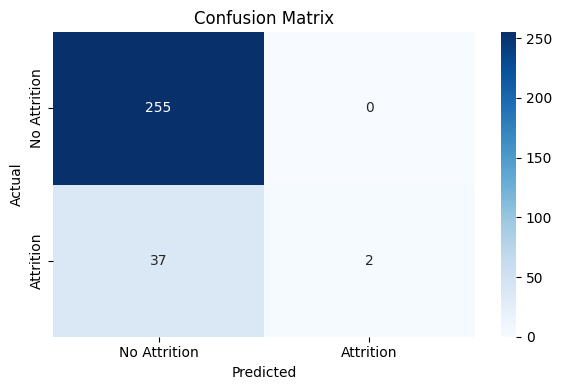

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# True labels and predicted labels from your test set
y_true = y_test
y_pred = best_model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


🔍 What Each Cell Means:

* Top Left (255) = True Negatives (TN)
→ 255 people did not leave, and the model correctly predicted they wouldn't.

* Top Right (0) = False Positives (FP)
→ 0 people did not leave, but the model incorrectly predicted they would.
✅ This is very good — no false alarms.

* Bottom Left (37) = False Negatives (FN)
→ 37 people did leave, but the model missed them and predicted they wouldn't.
❌ This is critical in attrition prediction — you missed identifying 37 people at risk.

* Bottom Right (2) = True Positives (TP)
→ 2 people did leave, and the model correctly identified them.

------


⚠️ What This Tells us
Recall for Attrition (Class 1) is low: only 2 out of 39 actual attrition cases were detected → Recall = 2 / (2 + 37) ≈ 0.05

Precision might still be okay because there are no false positives, but very low recall is a big issue for identifying attrition risk.

So, while our model is extremely good at identifying people who will stay, it struggles to correctly catch those who will leave — a very high false negative rate.

## ROC Curve Visualization

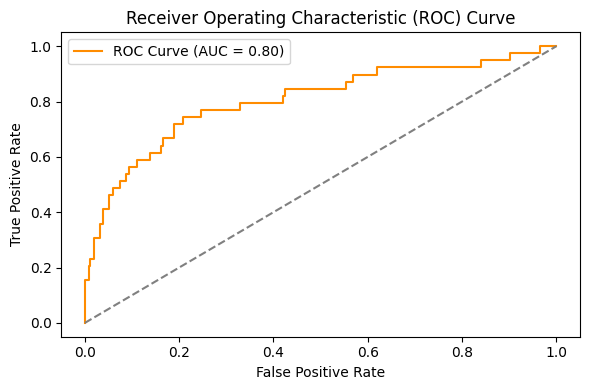

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predicted probabilities for the positive class
y_proba = best_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_proba)
roc_auc = roc_auc_score(y_true, y_proba)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.tight_layout()
plt.show()


The ROC-AUC of 0.80 shows our model is learning meaningful patterns and can separate attrition from non-attrition cases.

The confusion matrix just reflects performance at a single threshold (e.g., 0.5).
→ we can likely get much better recall by lowering the threshold.

## Learning Curve

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

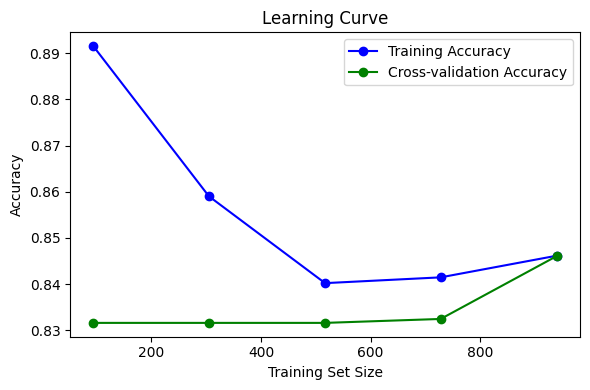

In [31]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Get learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    estimator=best_model,
    X=X_train,
    y=y_train,
    cv=5,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 5),
    random_state=42
)

# Calculate means and standard deviations
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_scores_mean, 'o-', label='Training Accuracy', color='blue')
plt.plot(train_sizes, test_scores_mean, 'o-', label='Cross-validation Accuracy', color='green')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


✅ What This Means

1- No Overfitting:

If our model were overfitting, we'd see high training accuracy and low, flat validation accuracy — with a large gap between the two.

But here, the gap closes as training size increases — a great sign.

2- Slight Underfitting Early On:

With small training sets, both training and validation accuracy are low compared to the final accuracy.

As more data is used, the model generalizes better.

3- Model is Learning Efficiently:

The training and validation lines converge, indicating a well-tuned model.

There’s no sign that adding more data will drastically change performance — we're close to your model's learning capacity with the current features.

🧠 Final Verdict:
our learning curve shows no serious overfitting or underfitting. The model is stable and generalizes well, especially as training size increases+
 we are likely close to the maximum performance achievable with the current features and model structure because Training and validation scores converge which means we have Well-Matched Capacity that Fits the data complexity just right

